In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#reading data from a csv file and displaying the first 4 columns and rows of data
disney = pd.read_csv('disney_plus_titles.csv')
disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [5]:
#Returns the number of rows and columns
disney.shape

(1450, 12)

In [6]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [10]:
#data types of each column
disney.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [8]:
disney.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [7]:
#Returns the number of null values
disney.isnull().sum()

,0
show_id,0
type,0
title,0
director,473
cast,190
country,219
date_added,3
release_year,0
rating,3
duration,0


In [9]:
#number of unique values in each column
disney.nunique()

,0
show_id,1450
type,2
title,1450
director,609
cast,1193
country,89
date_added,167
release_year,90
rating,9
duration,158


In [15]:
# Drop rows with any null values
disney.dropna(inplace=True)

In [16]:
#Check for duplicate rows in the dataset
duplicates = disney[disney.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


In [18]:
#If duplicates are found, consider removing them
disney.drop_duplicates(inplace=True)

In [20]:
# Get categorical columns
categorical_columns = disney.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


VISUALIZATIONS

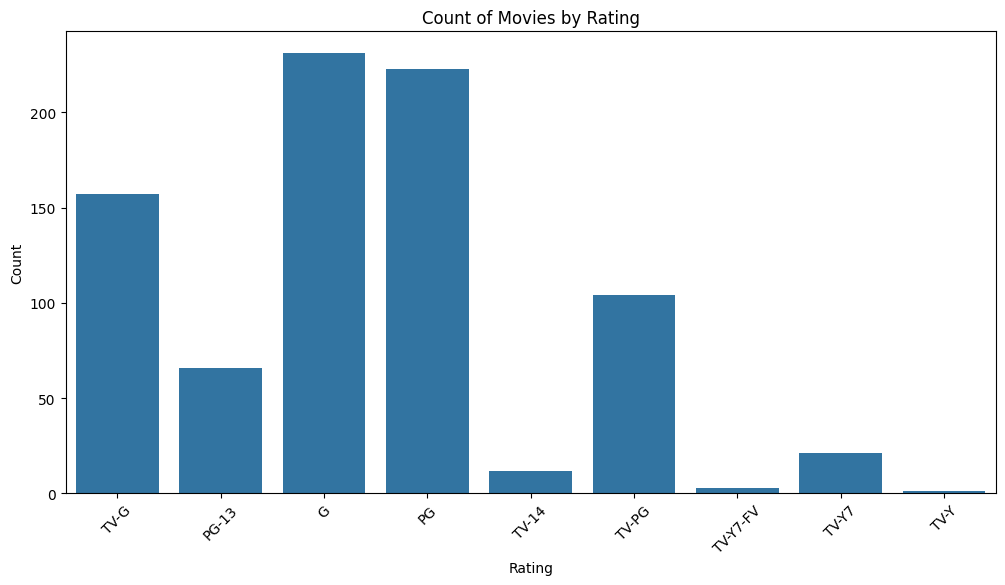

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=disney, x='rating')
plt.title('Count of Movies by Rating')
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


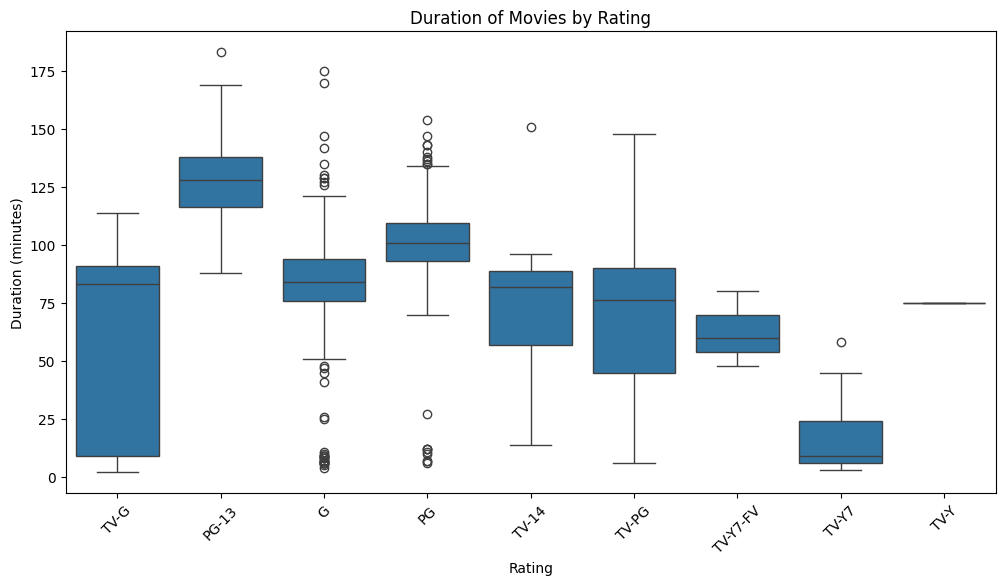

In [25]:
# Convert duration to numeric
disney['duration'] = disney['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(12, 6))
sns.boxplot(data=disney, x='rating', y='duration')
plt.title('Duration of Movies by Rating')
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.show()


<ipython-input-33-2bd3082495b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


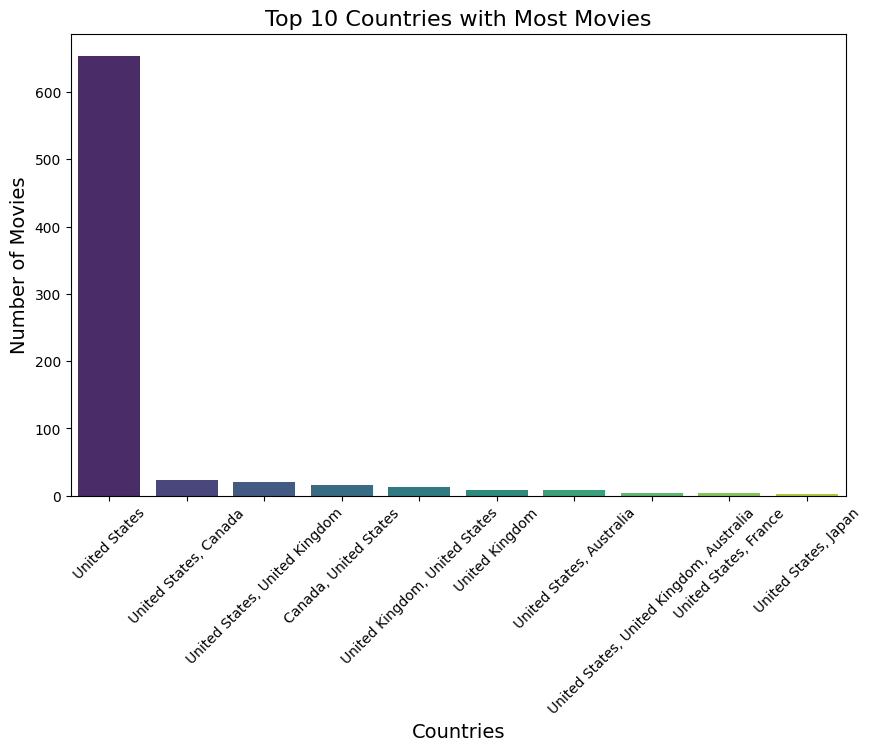

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Top 10 Countries with Most Movies', fontsize=16)
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45)
plt.show()



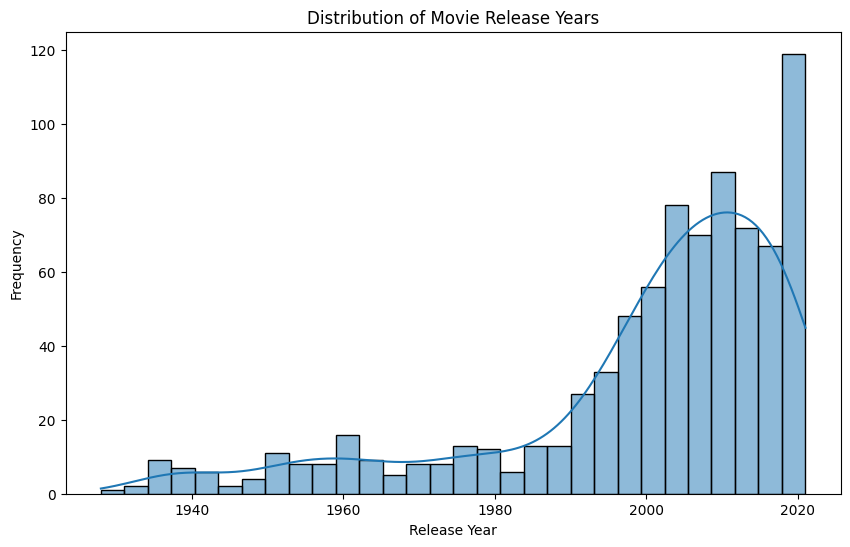

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(disney['release_year'], bins=30, kde=True)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


<ipython-input-35-e6b0c6c316ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette='viridis')


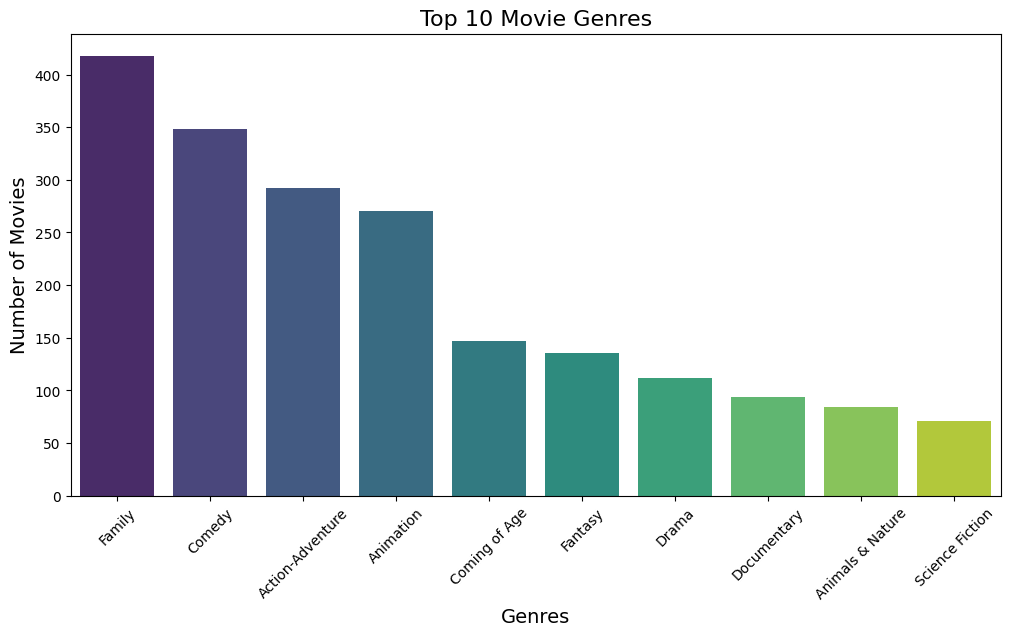

In [35]:
# Count of movies by genre
genre_counts = disney['listed_in'].str.split(', ').explode().value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette='viridis')
plt.title('Top 10 Movie Genres', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45)
plt.show()


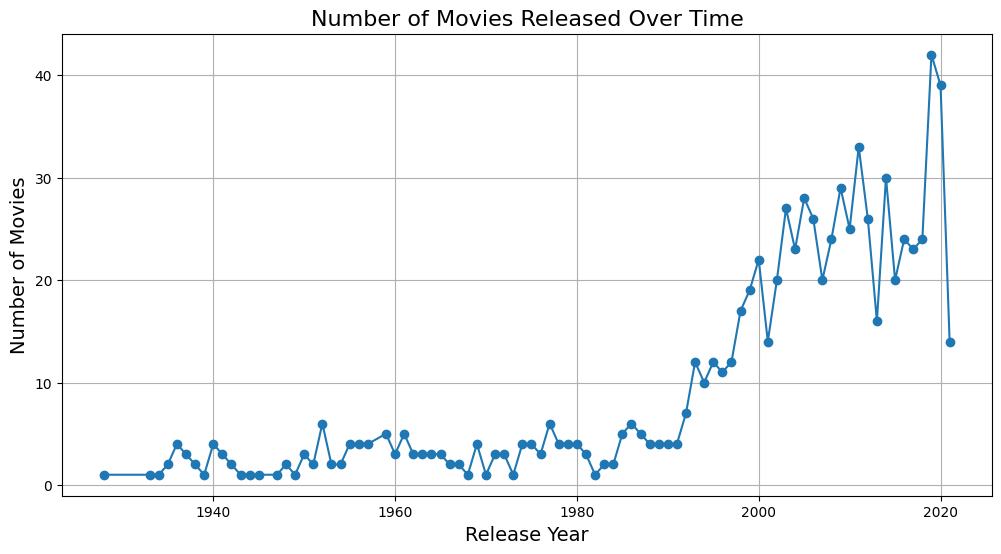

In [38]:
release_year_counts = disney['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o')
plt.title('Number of Movies Released Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.grid()
plt.show()
